In [ ]:
from __future__ import division
import numpy as np
import os
import glob
from random import *
from PIL import Image
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
# %matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda, ELU, Activation, BatchNormalization
#from keras.layers import Convolution2D as Conv2D
#from keras.layers import Cropping2D,ZeroPadding2D,MaxPooling2D
from keras.layers import Convolution2D, Cropping2D, ZeroPadding2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, Adam, RMSprop
from google.colab import drive

In [ ]:
#These are the forms in the dataset for quick access from manipulation of the file names on each column. Let's create a dictionary with form and writer mapping.
drive.mount('/content/gdrive')
d = {}
from subprocess import check_output
with open('gdrive/My Drive/RIO_HandWrittenTextExtraction/FormsIAMSmall.txt') as f:
 for line in f:
    key = line.split(' ')[0]
    writer = line.split(' ')[1]
    print(key, "::" , writer)
    d[key] = writer
print(len(d.keys()))


Mounted at /content/gdrive
a01-000u :: 000
a01-000x :: 001
a01-003 :: 002
a01-003u :: 000
a01-003x :: 003
a01-007 :: 004
a01-007u :: 000
a01-007x :: 003
a01-011 :: 005
a01-011u :: 000
a01-011x :: 006
a01-014 :: 007
a01-014u :: 000
a01-014x :: 008
a01-020 :: 009
a01-020u :: 000
a01-020x :: 010
a01-026 :: 009
a01-026u :: 000
a01-026x :: 008
a01-030 :: 005
a01-030u :: 000
a01-030x :: 010
a01-038 :: 007
a01-038x :: 011
a01-043 :: 012
a01-043u :: 000
a01-043x :: 011
a01-049 :: 012
a01-049u :: 000
a01-049x :: 000
a01-053 :: 013
a01-053u :: 000
a01-053x :: 014
a01-058 :: 013
a01-058u :: 000
a01-058x :: 014
a01-063 :: 013
a01-063u :: 000
a01-063x :: 015
a01-068u :: 000
a01-072u :: 000
a01-072x :: 001
a01-077 :: 016
a01-077u :: 000
a01-082u :: 000
a01-087 :: 017
a01-087u :: 000
a01-091 :: 016
a01-091u :: 000
a01-096u :: 000
a01-102 :: 016
a01-102u :: 000
a01-107 :: 018
a01-107u :: 000
a01-113 :: 018
a01-113u :: 000
a01-117 :: 019
a01-117u :: 000
a01-122 :: 019
a01-122u :: 000
a01-128 :: 019
a01

In [ ]:
# All file-names list and target-writer names list are created.
tmp = []
target_list = []
tempDict = {}
tempDict = d.copy()
print(tempDict)
path_to_files = os.path.join('gdrive/My Drive/RIO_HandWrittenTextExtraction/DataIAMFormSmall', '*')
for filename in sorted(glob.glob(path_to_files)):
    #print(filename)
    tmp.append(filename)
    image_name = filename.split('/')[-1]
    #print(image_name)
    file, ext = os.path.splitext(image_name)
    parts = file.split('-')
    form = parts[0] + '-' + parts[1]
    #print("Form Image :: ", form)
    tempDict = d.copy()
    for key in d.keys():
       print("Keys:: ",key , " :: Form : ", form)
       if key == form:
          val = tempDict.get(key)
          if val:
             #print("Form mapped with key :: ", key, " :: ", str(val))
             target_list.append(str(val))
             del tempDict[key]
     #print(target_list)

img_files = np.asarray(tmp)
img_targets = np.asarray(target_list)
#print(img_targets)
#print(img_files)
print(img_files.shape)
print(img_targets.shape)


Streaming output truncated to the last 5000 lines.
Keys::  a01-026u  :: Form :  a01-113u
Keys::  a01-026x  :: Form :  a01-113u
Keys::  a01-030  :: Form :  a01-113u
Keys::  a01-030u  :: Form :  a01-113u
Keys::  a01-030x  :: Form :  a01-113u
Keys::  a01-038  :: Form :  a01-113u
Keys::  a01-038x  :: Form :  a01-113u
Keys::  a01-043  :: Form :  a01-113u
Keys::  a01-043u  :: Form :  a01-113u
Keys::  a01-043x  :: Form :  a01-113u
Keys::  a01-049  :: Form :  a01-113u
Keys::  a01-049u  :: Form :  a01-113u
Keys::  a01-049x  :: Form :  a01-113u
Keys::  a01-053  :: Form :  a01-113u
Keys::  a01-053u  :: Form :  a01-113u
Keys::  a01-053x  :: Form :  a01-113u
Keys::  a01-058  :: Form :  a01-113u
Keys::  a01-058u  :: Form :  a01-113u
Keys::  a01-058x  :: Form :  a01-113u
Keys::  a01-063  :: Form :  a01-113u
Keys::  a01-063u  :: Form :  a01-113u
Keys::  a01-063x  :: Form :  a01-113u
Keys::  a01-068u  :: Form :  a01-113u
Keys::  a01-072u  :: Form :  a01-113u
Keys::  a01-072x  :: Form :  a01-113u
Keys::

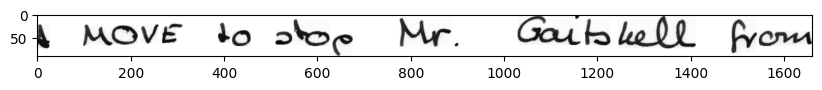

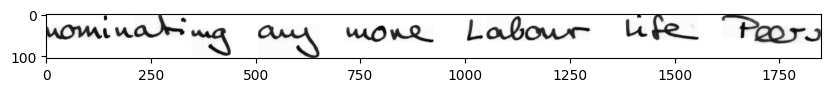

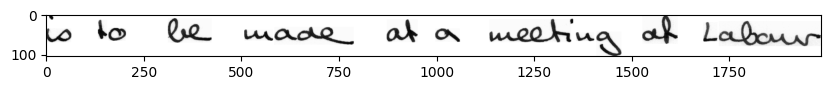

In [ ]:
#visualize the image data
for filename in img_files[:3]:
  img = mpimg.imread(filename)
  plt.figure(figsize=(10,10))
  plt.imshow(img, cmap='gray')

In [ ]:
# normalisation is done using label encoder. No, categorical data.
encoder = LabelEncoder()
encoder.fit(img_targets)
encoded_Y = encoder.transform(img_targets)

print(img_files[:10], img_targets[:10], encoded_Y[:10])

['gdrive/My Drive/RIO_HandWrittenTextExtraction/DataIAMFormSmall/a01-000u-s00-00.png'
 'gdrive/My Drive/RIO_HandWrittenTextExtraction/DataIAMFormSmall/a01-000u-s00-01.png'
 'gdrive/My Drive/RIO_HandWrittenTextExtraction/DataIAMFormSmall/a01-000u-s00-02.png'
 'gdrive/My Drive/RIO_HandWrittenTextExtraction/DataIAMFormSmall/a01-000u-s00-03.png'
 'gdrive/My Drive/RIO_HandWrittenTextExtraction/DataIAMFormSmall/a01-000u-s01-00.png'
 'gdrive/My Drive/RIO_HandWrittenTextExtraction/DataIAMFormSmall/a01-000u-s01-01.png'
 'gdrive/My Drive/RIO_HandWrittenTextExtraction/DataIAMFormSmall/a01-000u-s01-02.png'
 'gdrive/My Drive/RIO_HandWrittenTextExtraction/DataIAMFormSmall/a01-000u-s01-03.png'
 'gdrive/My Drive/RIO_HandWrittenTextExtraction/DataIAMFormSmall/a01-003u-s00-00.png'
 'gdrive/My Drive/RIO_HandWrittenTextExtraction/DataIAMFormSmall/a01-003u-s00-01.png'] ['000' '000' '000' '000' '000' '000' '000' '000' '000' '000'] [0 0 0 0 0 0 0 0 0 0]


In [ ]:
# Splitting of data into training and validation sets for cross validation with 4:1:1 ratio.
train_files, rem_files, train_targets, rem_targets = train_test_split(img_files, encoded_Y, train_size=0.66, random_state=52, shuffle= True)

validation_files, test_files, validation_targets, test_targets = train_test_split(rem_files, rem_targets, train_size=0.5, random_state=22, shuffle=True)

print(train_files.shape, validation_files.shape, test_files.shape)
print(train_targets.shape, validation_targets.shape, test_targets.shape)

(233,) (60,) (61,)
(233,) (60,) (61,)


In [ ]:
# Generator function for generating random crops from each sentence randomly cropping 113*113 patches from images
batch_size = 8
num_classes = 7
def generate_data(samples, target_files, batch_size=batch_size, factor = 0.1 ):
    num_samples = len(samples)
    from sklearn.utils import shuffle
    while 1: # Loop forever so the generator never terminates
      for offset in range(0, num_samples, batch_size):
        batch_samples = samples[offset:offset+batch_size]
        batch_targets = target_files[offset:offset+batch_size]

        images = []
        targets = []
        for i in range(len(batch_samples)):
          batch_sample = batch_samples[i]
          batch_target = batch_targets[i]
          im = Image.open(batch_sample)
          cur_width = im.size[0]
          cur_height = im.size[1]

          # print(cur_width, cur_height)

          height_fac = 113 / cur_height
          new_width = int(cur_width * height_fac)
          size = new_width, 113

          imresize = im.resize((size), Image.ANTIALIAS) # Resize so height = 113 while keeping aspect ratio
          now_width = imresize.size[0]
          now_height = imresize.size[1]
          # Generate crops of size 113x113 from this resized image and keep random 10% of crops

          avail_x_points = list(range(0, now_width - 113 ))# total x start points are from 0 to width -113

          # Pick random x%
          pick_num = int(len(avail_x_points)*factor)

          # Now pick
          random_startx = sample(avail_x_points, pick_num)

          for start in random_startx:
              imcrop = imresize.crop((start, 0, start+113, 113))
              images.append(np.asarray(imcrop))
              targets.append(batch_target)

        #trim image to only see section with road
        X_train = np.array(images)
        y_train = np.array(targets)

        #reshape X_train for feeding in later
        X_train = X_train.reshape(X_train.shape[0], 113, 113, 1)
        #convert to float and normalize
        X_train = X_train.astype('float32')
        X_train /= 255

        #One hot encode y
        y_train = to_categorical(y_train, num_classes)
        yield shuffle(X_train, y_train)

# For training and testing, generator function is called with the intent of making train and test generator data.
train_generator = generate_data(train_files, train_targets, batch_size=batch_size, factor = 0.3)
validation_generator = generate_data(validation_files, validation_targets, batch_size=batch_size, factor = 0.3)
test_generator = generate_data(test_files, test_targets, batch_size=batch_size, factor = 0.1)


In [ ]:
# A Keras Model is built. Summary of the model is printed below.
def resize_image(image):
    import tensorflow as tf
    return tf.image.resize(image,[56,56])

# Function to resize image to 64x64
row, col, ch = 113, 113, 1

model = Sequential()
model.add(ZeroPadding2D((1, 1), input_shape=(row, col, ch)))

# Resise data within the neural network
model.add(Lambda(resize_image)) #resize images to allow for easy computation

# CNN model - Building the model suggested in paper

model.add(Convolution2D(filters= 32, kernel_size =(5,5), strides= (2,2), padding='same', name='conv1')) #96
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2), name='pool1'))

model.add(Convolution2D(filters= 64, kernel_size =(3,3), strides= (1,1), padding='same', name='conv2')) #256
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2), name='pool2'))

model.add(Convolution2D(filters=128, kernel_size =(3,3), strides= (1,1), padding='same', name='conv3')) #256
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2), name='pool3'))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(128, name='dense1')) #1024
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(64, name='dense2')) #1024
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes,name='output'))
model.add(Activation('softmax')) #softmax since output is within 50 classes
print("Worked till here")

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

print(model.summary())

Worked till here
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPaddin  (None, 115, 115, 1)       0         
 g2D)                                                            
                                                                 
 lambda (Lambda)             (None, 56, 56, 1)         0         
                                                                 
 conv1 (Conv2D)              (None, 28, 28, 32)        832       
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 pool1 (MaxPooling2D)        (None, 14, 14, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 14, 14, 64)        18496     
                                       

In [ ]:
# Training the Model

nb_epoch = 4
samples_per_epoch = 233
nb_val_samples = 62

from keras.callbacks import ModelCheckpoint
filepath="gdrive/My Drive/check-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath= filepath, verbose=1, save_best_only=False)
callbacks_list = [checkpoint]

#Model fit generator
history_object = model.fit(train_generator, steps_per_epoch= samples_per_epoch,validation_data=validation_generator,validation_steps=nb_val_samples, epochs=nb_epoch, verbose=1, callbacks=callbacks_list)


<ipython-input-7-429fe5ec2d46>:27: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  imresize = im.resize((size), Image.ANTIALIAS) # Resize so height = 113 while keeping aspect ratio


Epoch 1/4
233/233 [==============================] - ETA: 0s - loss: 4.8040e-04 - accuracy: 0.9999
Epoch 1: saving model to gdrive/My Drive/check-01-0.0000.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


233/233 [==============================] - 1298s 6s/step - loss: 4.8040e-04 - accuracy: 0.9999 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/4
233/233 [==============================] - ETA: 0s - loss: 5.7430e-05 - accuracy: 1.0000
Epoch 2: saving model to gdrive/My Drive/check-02-0.0000.hdf5
233/233 [==============================] - 1341s 6s/step - loss: 5.7430e-05 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/4
233/233 [==============================] - ETA: 0s - loss: 3.7925e-05 - accuracy: 1.0000
Epoch 3: saving model to gdrive/My Drive/check-03-0.0000.hdf5
233/233 [==============================] - 1365s 6s/step - loss: 3.7925e-05 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/4
233/233 [==============================] - ETA: 0s - loss: 2.5660e-05 - accuracy: 1.0000
Epoch 4: saving model to gdrive/My Drive/check-04-0.0000.hdf5
233/233 [==============================] - 1377s 6s/step - loss: 2.5660e-05 - accuracy: 1.0000

In [ ]:
# Performance Metrics : test our model for calculating accuracy.

model.load_weights('gdrive/My Drive/check-04-0.0000.hdf5')
scores = model.evaluate_generator(test_generator,121) # 121 is the number of test images.
print("Accuracy = ", scores[1] , " ::" , len(scores))

<ipython-input-11-07767bde759b>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator,121) # 121 is the number of test images.
<ipython-input-7-429fe5ec2d46>:27: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  imresize = im.resize((size), Image.ANTIALIAS) # Resize so height = 113 while keeping aspect ratio


Accuracy =  1.0  :: 2


In [ ]:
#Load in test data.
images = []
for filename in test_files[:50]:
    im = Image.open(filename)

    cur_width = im.size[0]
    cur_height = im.size[1]

    print("Before Crop:", cur_width, cur_height)
    height_fac = 113 / cur_height

    new_width = int(cur_width * height_fac)
    size = new_width, 113

    imresize = im.resize((size), Image.ANTIALIAS) # Resize so height = 113 while keeping aspect ratio
    now_width = imresize.size[0]
    now_height = imresize.size[1]
    print("After Crop:", now_width, now_height)
    #Generate crops of size 113x113 from this resized image and keep random 10% of crops

    avail_x_points = list(range(0, now_width - 113 ))# total x start points are from 0 to width -113

    # Pick random x%
    factor = 0.1
    pick_num = int(len(avail_x_points)*factor)
    print("Pick Number is ::", pick_num)

    random_startx = sample(avail_x_points, pick_num)
    for start in random_startx:
        imcrop = imresize.crop((start, 0, start+113, 113))
        images.append(np.asarray(imcrop))

    X_test = np.array(images)

    X_test = X_test.reshape(X_test.shape[0], 113, 113, 1)

    #convert to float and normalize
    X_test = X_test.astype('float32')
    X_test /= 255
    shuffle(X_test)
print(X_test.shape)

Before Crop: 1989 96
After Crop: 2341 113
Pick Number is :: 222
Before Crop: 1718 85
After Crop: 2283 113
Pick Number is :: 217
Before Crop: 1875 92
After Crop: 2302 113
Pick Number is :: 218
Before Crop: 1966 88
After Crop: 2524 113
Pick Number is :: 241
Before Crop: 1205 78
After Crop: 1745 113
Pick Number is :: 163
Before Crop: 1878 81
After Crop: 2619 113
Pick Number is :: 250
Before Crop: 319 54
After Crop: 667 113
Pick Number is :: 55
Before Crop: 2070 112
After Crop: 2088 113
Pick Number is :: 197


<ipython-input-12-56a4653f2a8e>:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  imresize = im.resize((size), Image.ANTIALIAS) # Resize so height = 113 while keeping aspect ratio


Before Crop: 1886 106
After Crop: 2010 113
Pick Number is :: 189
Before Crop: 1990 86
After Crop: 2614 113
Pick Number is :: 250
Before Crop: 1815 73
After Crop: 2809 113
Pick Number is :: 269
Before Crop: 1818 104
After Crop: 1975 113
Pick Number is :: 186
Before Crop: 1741 77
After Crop: 2554 113
Pick Number is :: 244
Before Crop: 475 62
After Crop: 865 113
Pick Number is :: 75
Before Crop: 1106 69
After Crop: 1811 113
Pick Number is :: 169
Before Crop: 449 66
After Crop: 768 113
Pick Number is :: 65
Before Crop: 1759 75
After Crop: 2650 113
Pick Number is :: 253
Before Crop: 1768 78
After Crop: 2561 113
Pick Number is :: 244
Before Crop: 1868 79
After Crop: 2671 113
Pick Number is :: 255
Before Crop: 1044 68
After Crop: 1734 113
Pick Number is :: 162
Before Crop: 1885 98
After Crop: 2173 113
Pick Number is :: 206
Before Crop: 1850 105
After Crop: 1990 113
Pick Number is :: 187
Before Crop: 610 52
After Crop: 1325 113
Pick Number is :: 121
Before Crop: 1935 76
After Crop: 2877 113
Pi

In [ ]:
# Predicting the model
predictions = model.predict(X_test, verbose =1)

print(predictions.shape)
predicted_writer = []
for pred in predictions:
    predicted_writer.append(np.argmax(pred))
print(len(predicted_writer))

# Mapping test image with Trained image
writer_number = 0
total_images =10
counter = 0

for i in range(len(predicted_writer)//10):
    if predicted_writer[i] == writer_number:
       image = X_test[i].squeeze()
       plt.figure(figsize=(2,2))
       plt.imshow(image, cmap ='gray')



Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def plotgraph(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

In [ ]:
acc = history_object.history['accuracy']
val_acc = history_object.history['val_accuracy']
loss = history_object.history['loss']
val_loss = history_object.history['val_loss']
epochs = range(1,len(loss)+1)


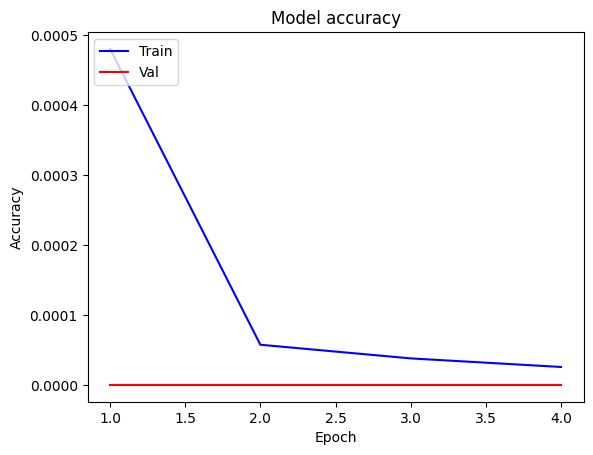

In [ ]:
plotgraph(epochs, loss, val_loss)


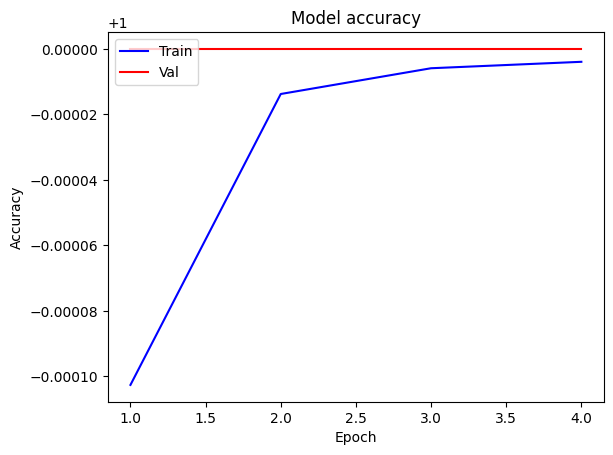

In [ ]:
plotgraph(epochs, acc, val_acc)
